In [4]:
import pandas as pd
from tabulate import tabulate

#用pandas讀取數據
df = pd.read_csv('hero_data.csv')

result = tabulate(df[:5],headers='keys',tablefmt='grid')
#result = tabulate(df[:5],headers='keys',tablefmt='grid')

#顯示數據類型
print('### 数据类型 ###')
print(df.dtypes,'\n')

#顯示列頭
print('### 列头 ###')
print(df.columns,'\n')

#打印前五行
print('### 前5行 ###')
print(result)

### 数据类型 ###
Hero                object
life                 int64
magic                int64
speed                int64
attack               int64
armor                int64
life_recovery        int64
magic_recovery       int64
attack_range         int64
attack_speed         int64
magic_resistance     int64
dtype: object 

### 列头 ###
Index(['Hero', 'life', 'magic', 'speed', 'attack', 'armor', 'life_recovery',
       'magic_recovery', 'attack_range', 'attack_speed', 'magic_resistance'],
      dtype='object') 

### 前5行 ###
+----+---------+--------+---------+---------+----------+---------+-----------------+------------------+----------------+----------------+--------------------+
|    | Hero    |   life |   magic |   speed |   attack |   armor |   life_recovery |   magic_recovery |   attack_range |   attack_speed |   magic_resistance |
+====+=========+========+=========+=========+==========+=========+=================+==================+================+================+=================

# 繪製熱量圖

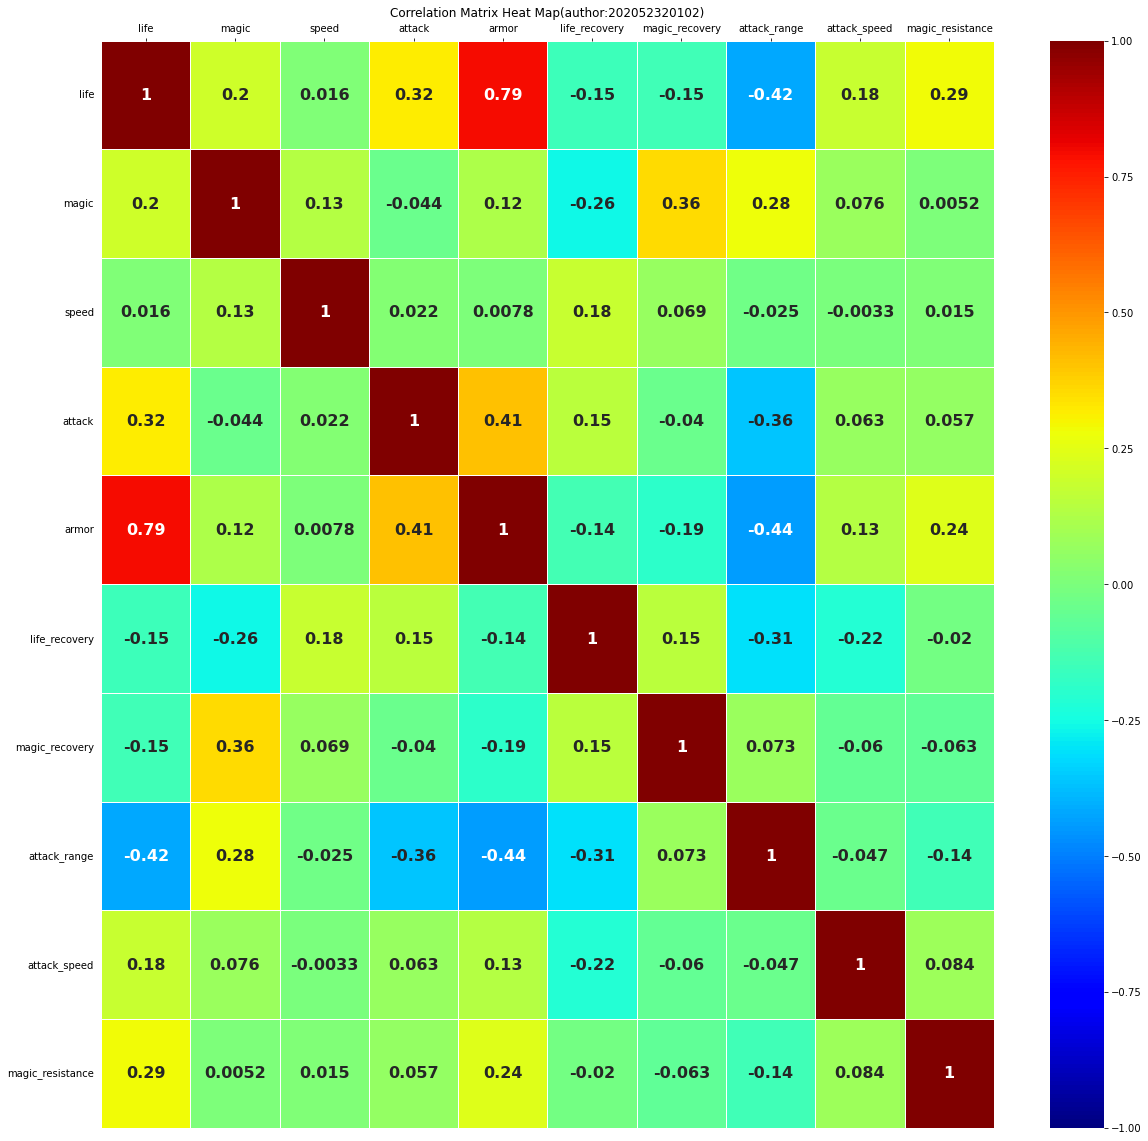

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
import numpy as np

#用pandas讀取數據
df = pd.read_csv('hero_data.csv')

#取出含有數據的所需列
data1 = list(df.columns.values[1:])#所需列名
data = df[data1]
#data = np.array(data)

#計算係數比
cm = np.corrcoef(data,rowvar=False)

#繪圖
fg,ax =plt.subplots(figsize=(20,20))
sns.heatmap(cm, 
            cmap='jet',  # 色彩的变化是 light yellow -> orange -> dark brown
            vmin=-1,vmax=1, # 设置色彩极值对应的数值
            linecolor='white',linewidth=1, # 每个方格之间用宽度为1的白线分割
            yticklabels=data1, xticklabels=data1, # 显示文字
            annot=True,     # 每一个格子要显示搭配的数字
            annot_kws={
                'fontsize':16, #显示的数字要16字号
                'fontweight': 'bold' #而且是粗体
            },
            ax=ax)

#取消部分刻度綫
plt.tick_params(bottom=False, top=True, left=False, right=False)

#刻度綫上文字調整
ax.tick_params(top=True, labeltop=True, # 上刻度和刻度文字显示
               bottom=False, labelbottom=False, # 下刻度和刻度文字不显示
               rotation=0) # 所有坐标轴刻度文字都水平显示

#設置標題
ax.set_title('Correlation Matrix Heat Map(author:202052320102)')
plt.show()

#保存成pdf格式
fg.savefig('heat_map.pdf')

# 繪製多量圖

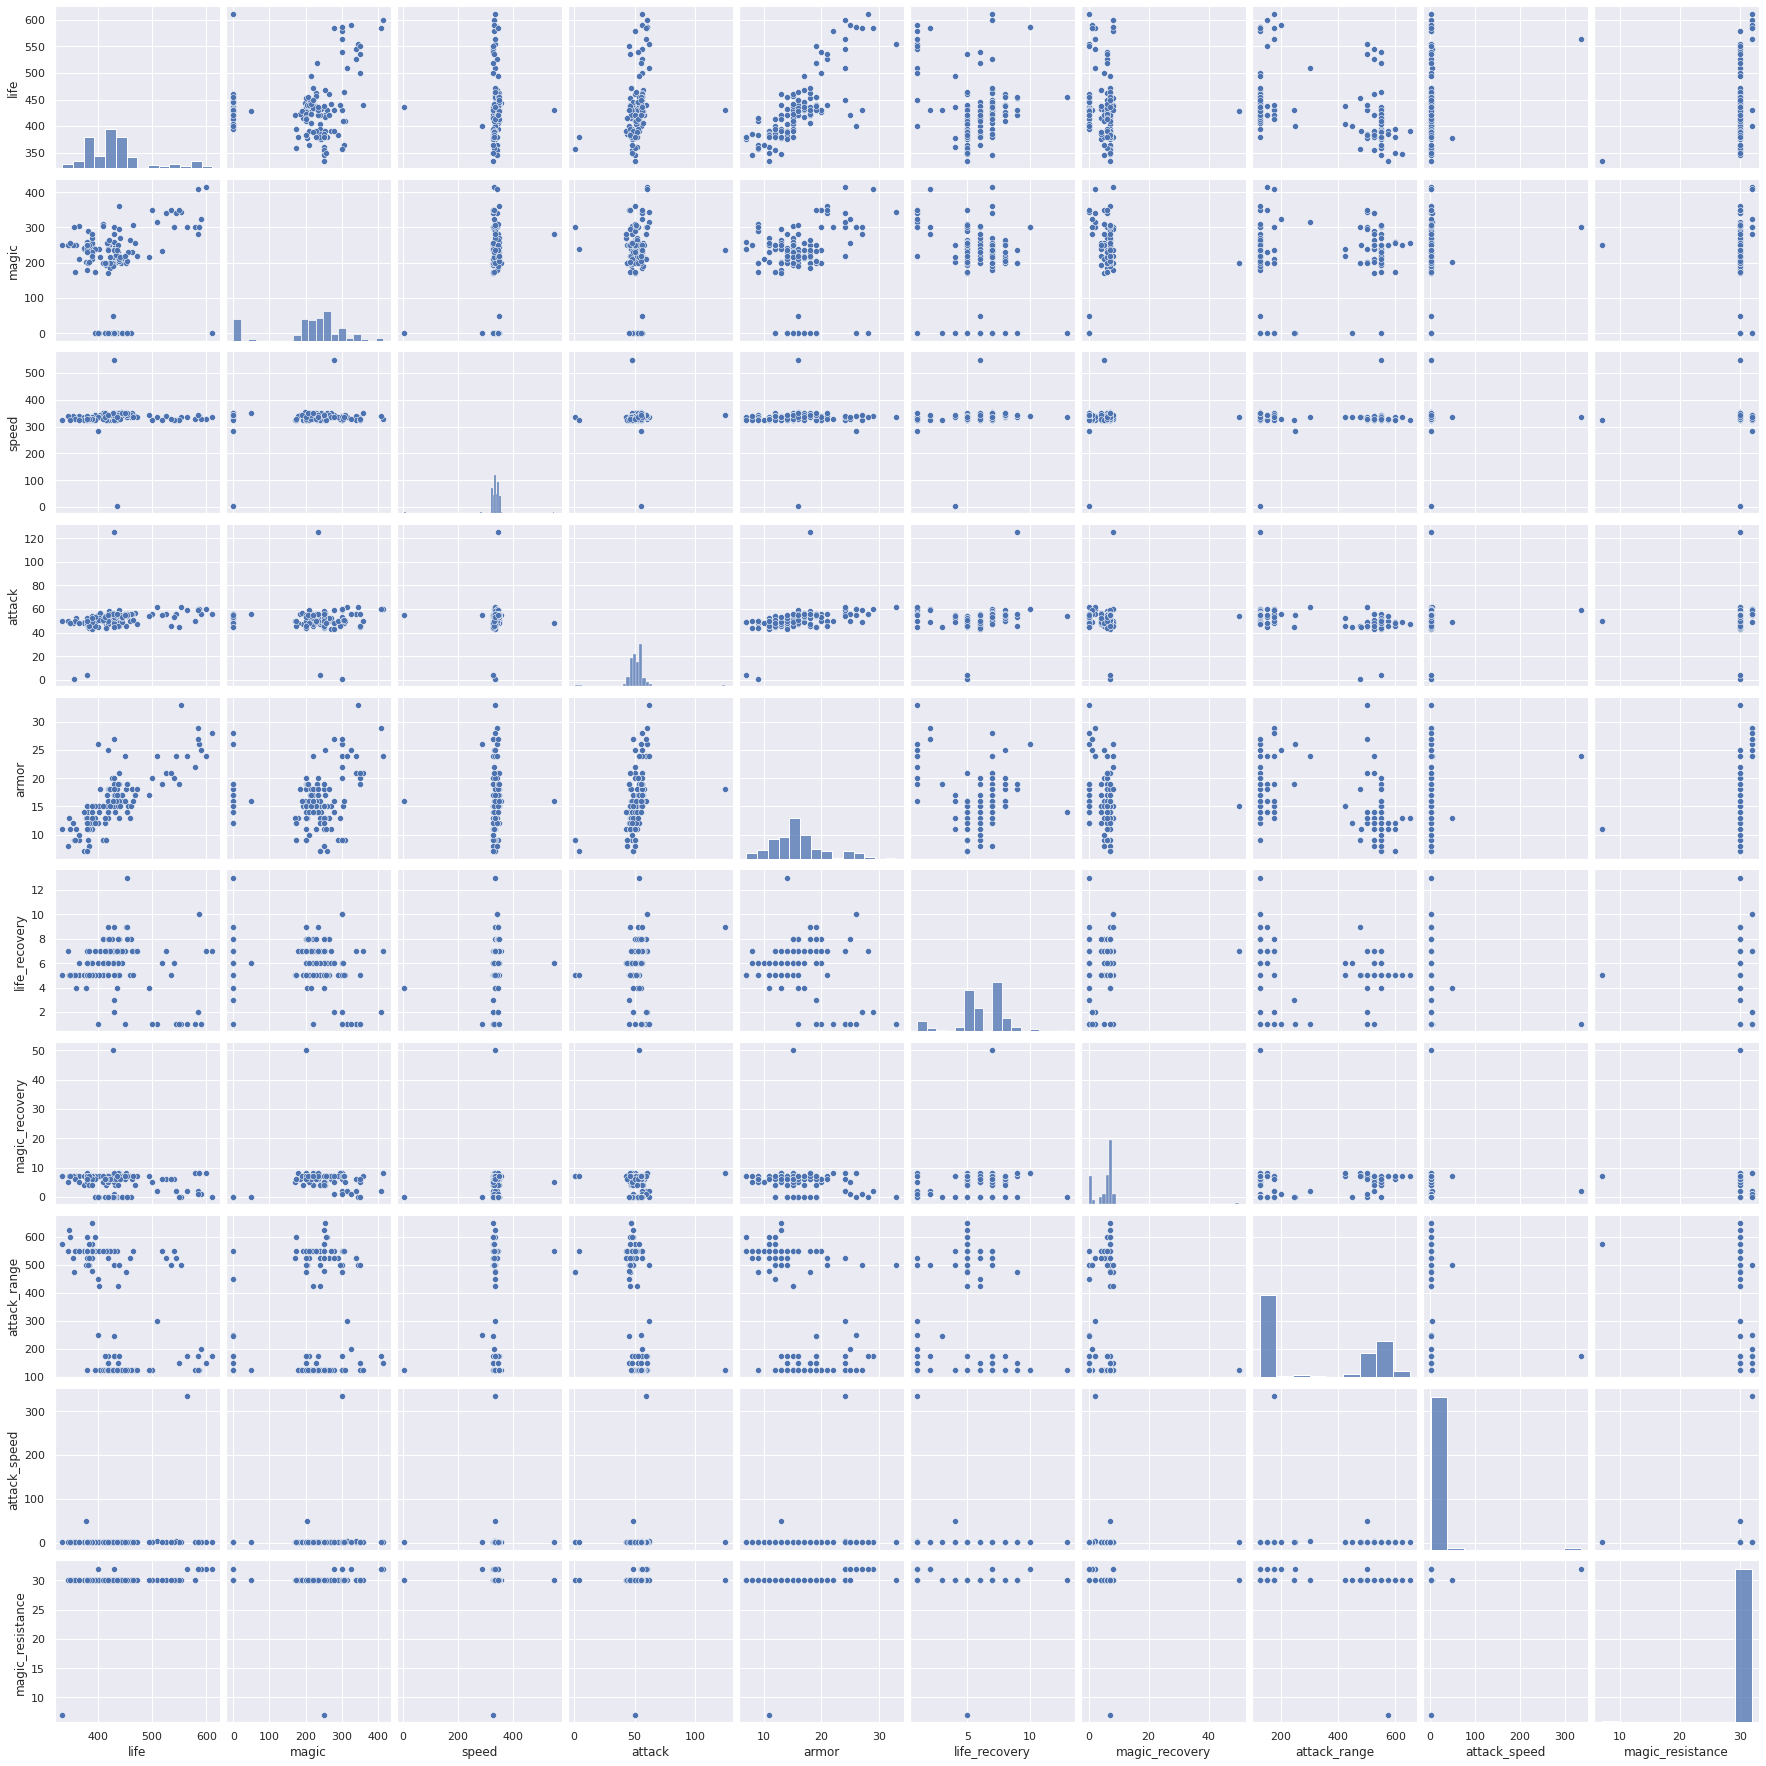

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns

#采用sns格式
sns.set()

#用pandas讀取數據
df = pd.read_csv('hero_data.csv')

#取出含有數據的所需列
data1 = list(df.columns.values[1:])#所需列名
data = df[data1]

#繪製多變量圖
figure = sns.pairplot(data=data)
figure.savefig('pair_plot.pdf')

# 密度圖

<AxesSubplot:ylabel='Density'>

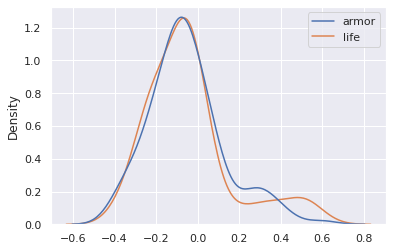

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
import numpy as np

#采用sns格式
sns.set()

#用pandas讀取數據
df = pd.read_csv('hero_data.csv')
#數據選取
df1 = df['life']
df2 = df['armor']

#標準化歸一
#獲得標準差
'''
hist1 = np.std(df1)
hist2 = np.std(df2)

df3 = (df1-df1.mean())/hist1
df4 = (df2-df2.mean())/hist2
'''

#極大極小值歸一
hist1 = (df1.max()-df1.min())
hist2 = (df2.max()-df2.min())

df3 = (df1-df1.min())/hist1-0.4
df4 = (df2-df2.min())/hist2-0.4

#繪圖
fg,ax = plt.subplots()
sns.kdeplot(data=[df4,df3],ax=ax)
#sns.kdeplot(df3,ax=ax)


<AxesSubplot:ylabel='Density'>

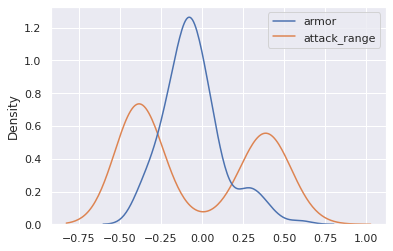

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
import numpy as np

#采用sns格式
sns.set()

#用pandas讀取數據
df = pd.read_csv('hero_data.csv')
#數據選取
df1 = df['attack_range']
df2 = df['armor']

#標準化歸一
#獲得標準差
'''
hist1 = np.std(df1)
hist2 = np.std(df2)

df3 = (df1-df1.mean())/hist1
df4 = (df2-df2.mean())/hist2
'''

#極大極小值歸一
hist1 = (df1.max()-df1.min())
hist2 = (df2.max()-df2.min())

df3 = (df1-df1.min())/hist1-0.4
df4 = (df2-df2.min())/hist2-0.4

#繪圖
fg,ax = plt.subplots()
sns.kdeplot(data=[df4,df3],ax=ax)


# 查找具体的游戏主角属性

In [93]:
import pandas as pd
import numpy as np
from tabulate import tabulate

def get_hero(df, name):
    ## TODO填充这个函数内容
    
        if name in np.array(df['Hero']):
            HeroName = df.loc[df['Hero'] == name]
            print(tabulate(HeroName,headers='keys',tablefmt='grid'))
        else:
            print('没有找到游戏主角: ',name)
            

df = pd.read_csv('hero_data.csv')
get_hero(df,"XXXXX")
get_hero(df,"Kai Yin")



没有找到游戏主角:  XXXXX
+----+---------+--------+---------+---------+----------+---------+-----------------+------------------+----------------+----------------+--------------------+
|    | Hero    |   life |   magic |   speed |   attack |   armor |   life_recovery |   magic_recovery |   attack_range |   attack_speed |   magic_resistance |
+====+=========+========+=========+=========+==========+=========+=================+==================+================+================+====================+
|  4 | Kai Yin |    585 |     410 |     340 |       60 |      29 |               2 |                2 |            175 |              1 |                 32 |
+----+---------+--------+---------+---------+----------+---------+-----------------+------------------+----------------+----------------+--------------------+


In [118]:
import pandas as pd
import numpy as np
from tabulate import tabulate

def get_heros(df, name):
    ## TODO填充这个函数内容
    lenght = len(name)                #獲取name長度
    LZ = []                           #創建空列表，用於裝載查找數據
    header=np.array(df.columns)       #獲取列名
    for i in name:
        if i in np.array(df['Hero']):
            HeroName = df.loc[df['Hero'] == i]     #抽取所需行         
            LZ.append(HeroName)                    #放入LZ中
            #print(tabulate(HeroName,headers='keys',tablefmt='grid'))
        else:
            print('没有找到游戏主角: ',i)
    LZ = np.array(LZ).reshape(lenght,-1)             #numpy數組化
    #print(LZ)
    print(tabulate(LZ,headers=header,tablefmt='grid'))    #打印出需求表
            

df = pd.read_csv('hero_data.csv')
get_heros(df,['Kai Yin','Kasha','Zoe','Kai Yin'])


+---------+--------+---------+---------+----------+---------+-----------------+------------------+----------------+----------------+--------------------+
| Hero    |   life |   magic |   speed |   attack |   armor |   life_recovery |   magic_recovery |   attack_range |   attack_speed |   magic_resistance |
+=========+========+=========+=========+==========+=========+=================+==================+================+================+====================+
| Kai Yin |    585 |     410 |     340 |       60 |      29 |               2 |                2 |            175 |              1 |                 32 |
+---------+--------+---------+---------+----------+---------+-----------------+------------------+----------------+----------------+--------------------+
| Kasha   |    554 |     344 |     335 |       62 |      33 |               1 |                0 |            500 |              1 |                 30 |
+---------+--------+---------+---------+----------+---------+---------------